In [35]:
from fastbook import *

In [41]:
# Recherche d'images
urls = search_images_ddg('grizzly photos', max_images=1)

# Filtrer pour trouver la première URL en .jpg
jpg_urls = [url for url in urls if url.lower().endswith('.jpg')]
jpg_url = jpg_urls[0] if jpg_urls else "Aucune image .jpg trouvée"

len(jpg_urls), jpg_url

(1,
 'https://wallpapers.com/images/hd/grizzly-bear-pictures-3072-x-2304-zw9f8q3pz6dw5v8t.jpg')

In [44]:
dest = Path('grizzly.jpg')
if not dest.exists():download_url(urls[0], dest, show_progress = False)

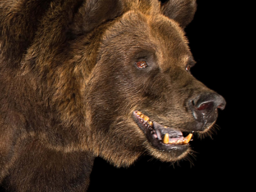

In [45]:
im = Image.open(dest)
im.to_thumb(256,256)

In [46]:
bear_types = 'grizzly','black','teddy'
path = Path('bears')

In [64]:
# Liste des termes de recherche
searches = ['grizzly', 'black', 'teddy']

# Chemin du répertoire principal
path = Path('bears')

# Vérification et création du répertoire principal
if not path.exists():
    path.mkdir()

# Boucle sur chaque terme de recherche
for search_term in searches:
    # Création du sous-répertoire pour chaque terme de recherche
    dest = path / search_term
    dest.mkdir(exist_ok=True)

    # Recherche d'images
    results = search_images_ddg(f'{search_term} bear photo')

    # Téléchargement des images
    download_images(dest, urls=results[:200])

    # Redimensionnement des images
    resize_images(dest, max_size=400, dest=dest)

In [65]:
fns = get_image_files(path)
fns

(#551) [Path('bears/black/01dabaea-d419-43a1-9acb-76b0cbc6bf9e.jpg'),Path('bears/black/01e038f8-0bf9-4e4d-b4af-4016a6ed13d6.jpg'),Path('bears/black/03525711-79e0-49d3-8117-7ecfc3a6cfdb.jpg'),Path('bears/black/039843c3-c643-46db-a958-3a85d2442bc4.jpg'),Path('bears/black/0421d0db-17d7-458a-a267-ee6238a2270a.jpg'),Path('bears/black/052912ec-cc37-4b71-a03a-8a102b627485.jpg'),Path('bears/black/0591357a-7113-478b-abb1-f575b748671d.jpg'),Path('bears/black/0602624e-fb13-4ee2-8a4e-e26174edf846.jpg'),Path('bears/black/064e61a6-ccaa-4702-a003-c706acc9aa0b.jpg'),Path('bears/black/066c5ee6-2e4e-47f7-b90e-d9765528297d.jpg'),Path('bears/black/06e99c96-1e83-40a9-b9e7-8718d3ff725c.jpg'),Path('bears/black/0a579390-a357-4d46-9b2e-c1f0334c390d.jpeg'),Path('bears/black/0d5a03f4-733c-4e55-9ca0-caa8ede80048.jpg'),Path('bears/black/0eba0a2f-4b70-4ee3-887d-cbbd952e758f.jpg'),Path('bears/black/10218e8e-2017-4f9c-9d88-76bed34f35e9.png'),Path('bears/black/1129d3ba-ad96-4ef0-bc8b-b8f8d89ce160.jpg'),Path('bears/bla

In [67]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)

(#75) [None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None...]

In [88]:
# 1. Créer le DataBlock avec des transforms simples
bears = DataBlock(
    blocks = (ImageBlock, CategoryBlock),
    get_items = get_image_files,
    splitter = RandomSplitter(valid_pct=0.2, seed=42),
    get_y = parent_label,
    item_tfms=Resize(128)
)

# 2. Créer des dataloaders simples
dls1 = bears_block.dataloaders(path)

# 3. Créer un autre DataBlock avec des transforms plus avancées
bears_aug = bears_block.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms()
)

# 4. Créer des dataloaders avec augmentation
dls2 = bears_aug.dataloaders(path)

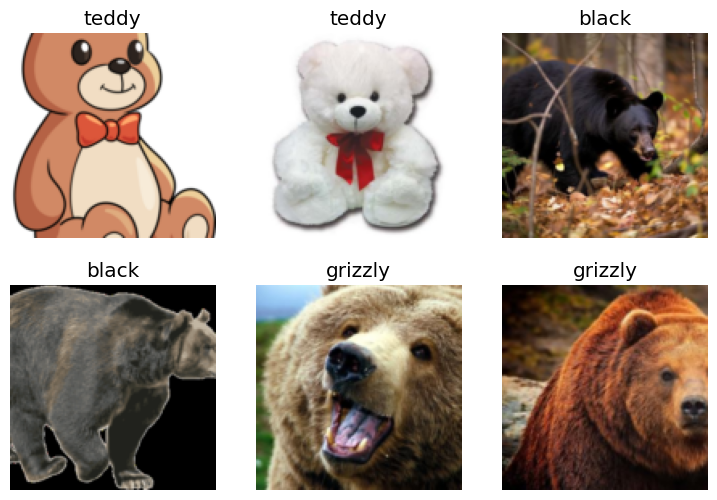

In [84]:
#dataloader simple
bears.show_batch(max_n=6)
     

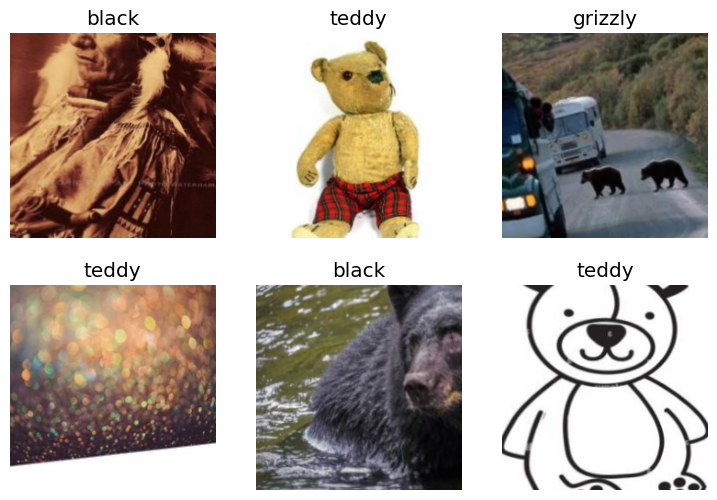

In [80]:
#dataloader avec augmentation
dls2.show_batch(max_n=6)

In [89]:
bears = bears.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = bears.dataloaders(path)

In [90]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.639621,0.406715,0.210526,00:15


epoch,train_loss,valid_loss,error_rate,time
0,0.441747,0.274778,0.105263,00:20
1,0.388387,0.299520,0.105263,00:20
2,0.335199,0.356932,0.105263,00:20
3,0.273506,0.371402,0.084211,00:20


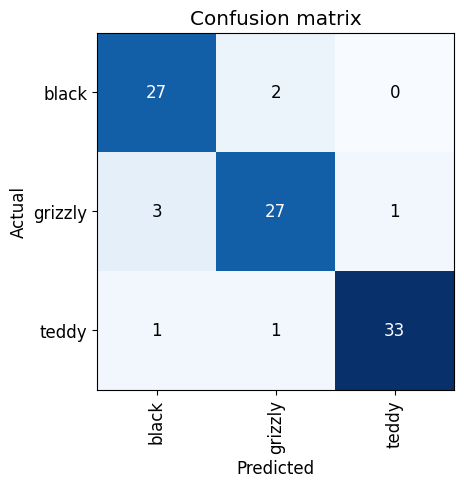

In [92]:
#matrice de confusion qui permet de voir les erreurs effectuées par notre modèle
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

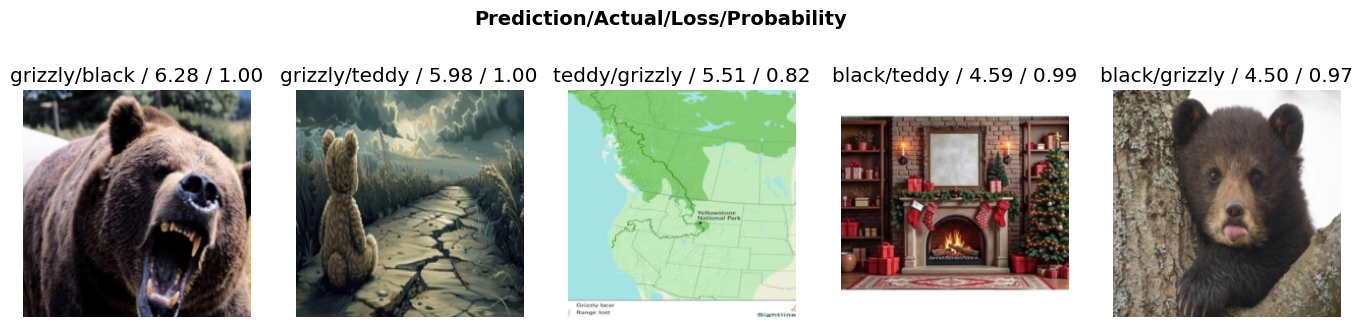

In [95]:
interp.plot_top_losses(5, nrows=1, figsize=(17,4))